In [1]:
import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

# Full path to your CSV
file_path = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_train.csv"

# Create a Pandas DataFrame from the CSV data
mushroom_df = pd.read_csv(file_path)

mushroom_df = mushroom_df.set_index('Id')
# Show first rows
print(mushroom_df.head())

     cap.shape cap.color  bruises stalk.color.above.ring  \
Id                                                         
6573         k         e    False                      w   
4426         f         e     True                      p   
7018         b         w    False                      w   
5789         k         g    False                      w   
6187         f         n     True                      p   

     stalk.color.below.ring population  poisonous  
Id                                                 
6573                      w          v          1  
4426                      w          y          0  
7018                      w          s          0  
5789                      w          n          0  
6187                      g          v          0  


In [2]:
file_path = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_test.csv"

X_comp = pd.read_csv(file_path)

X_comp = X_comp.set_index('Id')
# Show first rows
print(X_comp.head())


     cap.shape cap.color stalk.color.above.ring stalk.color.below.ring  \
Id                                                                       
5165         f         w                      w                      w   
4281         f         g                      n                      p   
231          x         n                      w                      p   
3890         f         n                      w                      w   
1521         x         y                      n                      p   

      bruises population  
Id                        
5165     True          v  
4281    False          v  
231      True          v  
3890    False          s  
1521    False          v  


In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import (
    train_test_split, cross_val_predict, cross_validate, KFold
)
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    classification_report, roc_curve, auc,
    confusion_matrix, make_scorer,
    RocCurveDisplay, ConfusionMatrixDisplay
)

In [4]:
# 1. Read and split data
# 2. Initialize pipeline
# 3. Tuning Hyperparameters (optional, but will allow you to ascend in the leaderboard)
# 4. Plotting ROC (optional)
# 5. Manually Picking a Classification Threshold
# 6. Tuning Threshold 
# 7. Using a Classification Threshold. Evaluating on Testing Data
# 8. Deployment (fitting model to full X, y set and predicting competition data)

In [5]:
mushroom_df.columns

Index(['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population', 'poisonous'],
      dtype='object')

In [6]:
y = mushroom_df.pop("poisonous")
X = mushroom_df

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Examine predictor features
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6499 entries, 6573 to 373
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               6499 non-null   object
 1   cap.color               6499 non-null   object
 2   bruises                 6499 non-null   bool  
 3   stalk.color.above.ring  6499 non-null   object
 4   stalk.color.below.ring  6499 non-null   object
 5   population              6499 non-null   object
dtypes: bool(1), object(5)
memory usage: 311.0+ KB


In [7]:
X_comp.columns

Index(['cap.shape', 'cap.color', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'bruises', 'population'],
      dtype='object')

In [8]:
X_comp= X_comp[X.columns]

In [9]:
X_comp.columns

Index(['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population'],
      dtype='object')

In [10]:
X.columns

Index(['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population'],
      dtype='object')

In [11]:
y

Id
6573    1
4426    0
7018    0
5789    0
6187    0
       ..
7002    1
7323    1
6206    1
4658    0
373     1
Name: poisonous, Length: 6499, dtype: int64

In [12]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [13]:
# --- Step 2: Initialize pipeline (no fitting yet)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

# Identify columns from your already-defined X
cat_cols  = X.select_dtypes(include=["object"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()

# Preprocess blocks
cat_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_enc", ce.TargetEncoder(handle_unknown="impute", handle_missing="impute"))
])

bool_preprocess = Pipeline(steps=[
    ("to_int", FunctionTransformer(lambda df: df.astype("int64"))),
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("cat",  cat_preprocess,  cat_cols),
        ("bool", bool_preprocess, bool_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# Classifier (no scaling needed)
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

# Full pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf)
])

# Show the pipeline
print(pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_enc',
                                                                   TargetEncoder(handle_missing='impute',
                                                                                 handle_unknown='impute'))]),
                                                  ['cap.shape', 'cap.color',
                                                   'stalk.color.above.ring',
                                                   'stalk.color.below.ring',
                                                   'population']),
                                                 ('bool',
                                                  Pipeline(steps=[('to_i

In [14]:
from sklearn import set_config
import matplotlib.pyplot as plt

# Show pipeline as a diagram instead of plain text
set_config(display='diagram')

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_enc',
                                                                   TargetEncoder(handle_missing='impute',
                                                                                 handle_unknown='impute'))]),
                                                  ['cap.shape', 'cap.color',
                                                   'stalk.color.above.ring',
                                                   'stalk.color.below.ring',
                                                   'population']),
                                                 ('bool',
                                                  Pipeline(steps=[('to_int',
                                                                   FunctionTransformer(func=<function <lambda> at 0x30a4b0900>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['bruises'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                        random_state=42))])

In [15]:
# 3. Tuning Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
import numpy as np

# Define the parameter grid for RandomForest
param_distributions = {
    "rf__n_estimators": [200, 300, 400, 500, 700],
    "rf__max_depth": [None, 5, 10, 15, 20, 30],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ["sqrt", "log2", None],
    "rf__class_weight": [None, "balanced_subsample"]
}

# Scorer: we want to maximize recall for poisonous mushrooms (class 1)
recall_scorer = make_scorer(recall_score, pos_label=1)

# Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,                # try 25 random combinations
    scoring=recall_scorer,    # focus on recall
    cv=5,                     # 5-fold CV on train split
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training set (not full data)
random_search.fit(X_train, y_train)

print("Best Recall (CV):", random_search.best_score_)
print("Best Parameters:")
for k, v in random_search.best_params_.items():
    print(f"  {k}: {v}")

# Best model pipeline
best_model = random_search.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Recall (CV): 0.9752988047808765
Best Parameters:
  rf__n_estimators: 700
  rf__min_samples_split: 10
  rf__min_samples_leaf: 1
  rf__max_features: None
  rf__max_depth: 30
  rf__class_weight: balanced_subsample


In [16]:
# ==== 4) ROC / PR (optional but useful) ====
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score, classification_report, confusion_matrix
import numpy as np

y_test_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
pr_auc  = average_precision_score(y_test, y_test_proba)
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Test PR  AUC: {pr_auc:.4f}")

# (Plot if you want)
# import matplotlib.pyplot as plt
# fpr, tpr, thr_roc = roc_curve(y_test, y_test_proba)
# plt.plot(fpr, tpr); plt.plot([0,1],[0,1],"--"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC"); plt.show(

Test ROC AUC: 0.9947
Test PR  AUC: 0.9942


In [17]:
# ==== 5) Pick an initial threshold by target recall ====
target_recall = 0.98  # tweak as needed
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# get the smallest threshold that achieves the target recall
idx = np.where(rec >= target_recall)[0]
thr_opt = thr[idx[0]-1] if len(idx) and idx[0] > 0 else 0.5
print("Chosen threshold:", thr_opt)

Chosen threshold: 0.5


In [18]:
# ==== 6) (Optional) Tune threshold with a precision floor ====
# Example: maximize recall subject to precision >= 0.9 (adjust as needed)
best_thr, best_rec = thr_opt, 0.0
for t in np.unique(np.concatenate([[0.0], thr, [1.0]])):
    y_pred_t = (y_test_proba >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)
    tp = cm[1,1]; fp = cm[0,1]; fn = cm[1,0]
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall    = tp / (tp + fn) if (tp + fn) else 0.0
    if precision >= 0.90 and recall >= best_rec:
        best_rec, best_thr = recall, t

thr_final = best_thr
print(f"Final threshold (with precision floor): {thr_final:.4f}")

# Evaluate at final threshold
y_pred_final = (y_test_proba >= thr_final).astype(int)
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final, digits=4))

Final threshold (with precision floor): 0.2454
Confusion matrix (test):
 [[592  61]
 [ 10 637]]
              precision    recall  f1-score   support

           0     0.9834    0.9066    0.9434       653
           1     0.9126    0.9845    0.9472       647

    accuracy                         0.9454      1300
   macro avg     0.9480    0.9456    0.9453      1300
weighted avg     0.9482    0.9454    0.9453      1300



In [19]:
# ==== 8) Deployment: fit on FULL X,y, then predict competition ====
import os
import pandas as pd
import numpy as np
from sklearn.base import clone

# Refit the best pipeline on ALL labeled data
final_model = clone(best_model).fit(X, y)

# --- Naming adjusted to match competition instructions ---
comp_probs = final_model.predict_proba(X_comp)[:, 1]

# Use your tuned threshold (thr_final) if defined; otherwise default to 0.5
threshold = globals().get("thr_final", globals().get("thr_opt", 0.5))
comp_preds = (comp_probs >= threshold).astype(int)

# === File save directory ===
output_dir = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition"
os.makedirs(output_dir, exist_ok=True)

# === Save the competition-style CSV ===
# (Exactly what the Colab notebook shows)
pd.DataFrame(
    {'poisonous': comp_preds},
    index=X_comp.index
).to_csv(f"{output_dir}/submission_labels.csv")

# If you also want the probabilities file (optional, for AUC metrics)
pd.DataFrame(
    {'poisonous': comp_probs},
    index=X_comp.index
).to_csv(f"{output_dir}/submission_proba.csv")

print("✅ Submission files saved successfully!")
print("→ Labels:", f"{output_dir}/submission_labels.csv")
print("→ Probabilities:", f"{output_dir}/submission_proba.csv")
print("Label counts:", pd.Series(comp_preds).value_counts().to_dict())
print("Proba range:", float(np.min(comp_probs)), "to", float(np.max(comp_probs)))

✅ Submission files saved successfully!
→ Labels: /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/submission_labels.csv
→ Probabilities: /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/submission_proba.csv
Label counts: {1: 818, 0: 807}
Proba range: 0.0 to 1.0


In [20]:
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
)
import numpy as np

# Get predicted probabilities on your test set
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Use your tuned threshold (or 0.5 if you didn’t tune)
threshold = globals().get("thr_final", 0.5)
y_test_pred = (y_test_proba >= threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Detailed metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nAccuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# Optional full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

Confusion Matrix:
[[592  61]
 [ 10 637]]

Accuracy : 0.9454
Precision: 0.9126
Recall   : 0.9845

Classification Report:
              precision    recall  f1-score   support

           0     0.9834    0.9066    0.9434       653
           1     0.9126    0.9845    0.9472       647

    accuracy                         0.9454      1300
   macro avg     0.9480    0.9456    0.9453      1300
weighted avg     0.9482    0.9454    0.9453      1300



CV Accuracy: 0.9501
CV Precision: 0.9141
CV Recall: 0.9905


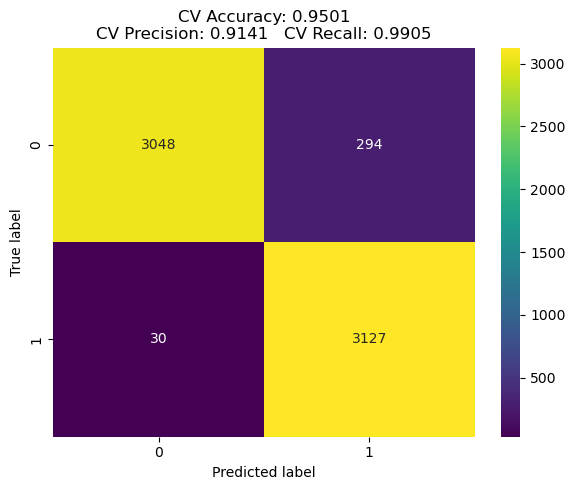

In [21]:
# ===== Cross-validated confusion matrix + metrics =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score
)

# Use tuned threshold if you have one; fallback to 0.5
threshold = globals().get("thr_final", globals().get("thr_opt", 0.5))

# 5-fold CV predictions of probabilities for the positive class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
probs_cv = cross_val_predict(best_model, X, y, cv=cv, method="predict_proba")[:, 1]

# Turn probabilities into labels via your threshold
preds_cv = (probs_cv >= threshold).astype(int)

# Metrics
cm = confusion_matrix(y, preds_cv, labels=[0,1])
acc = accuracy_score(y, preds_cv)
prec = precision_score(y, preds_cv)
rec = recall_score(y, preds_cv)

print(f"CV Accuracy: {acc:.4f}")
print(f"CV Precision: {prec:.4f}")
print(f"CV Recall: {rec:.4f}")

# Plot heatmap
plt.figure(figsize=(6,5))
ax = sns.heatmap(cm, annot=True, fmt="d", cbar=True, cmap="viridis",
                 xticklabels=[0,1], yticklabels=[0,1])
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title(f"CV Accuracy: {acc:.4f}\nCV Precision: {prec:.4f}   CV Recall: {rec:.4f}")
plt.tight_layout()
plt.show()

In [22]:
# =========================
# 0) Imports & quiet logs
# =========================
import os, warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    precision_recall_curve, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, make_scorer
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import clone
from sklearn.ensemble import HistGradientBoostingClassifier
import category_encoders as ce

# If you haven't already split:
if 'X_train' not in globals() or 'y_train' not in globals():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

# =========================
# 1) Preprocess blocks
# =========================
cat_cols  = X.select_dtypes(include=["object"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()

cat_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_enc", ce.TargetEncoder(handle_unknown="impute", handle_missing="impute")),
])

bool_preprocess = Pipeline(steps=[
    ("to_int", FunctionTransformer(lambda df: df.astype("int64"))),
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("cat",  cat_preprocess,  cat_cols),
        ("bool", bool_preprocess, bool_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# =========================
# 2) HistGradientBoosting + CV tuning (optimize RECALL)
# =========================
gb = HistGradientBoostingClassifier(random_state=42)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("gb", gb),
])

param_distributions = {
    "gb__learning_rate":     [0.03, 0.05, 0.08, 0.1, 0.15],
    "gb__max_iter":          [200, 300, 500],
    "gb__max_depth":         [None, 3, 5, 7],
    "gb__min_samples_leaf":  [10, 20, 30],
    "gb__l2_regularization": [0.0, 0.1, 0.5],
    # "gb__early_stopping":  [True]  # keep default True for stability
}

recall_scorer = make_scorer(recall_score, pos_label=1)

rs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    error_score=0.0,    # failed fits score as 0 instead of NaN
)

rs.fit(X_train, y_train)
best_model = rs.best_estimator_
print("Best CV Recall (HistGB):", rs.best_score_)
print("Best Params (HistGB):", rs.best_params_)

# =========================
# 3) Pick the BEST threshold with Recall = 1.0 (max precision) on hold-out
# =========================
y_test_proba = best_model.predict_proba(X_test)[:, 1]
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# thresholds array has len N; precision/recall have len N+1
mask = (rec[:-1] == 1.0)            # positions where recall == 1.0
thr_candidates  = thr[mask]
prec_candidates = prec[:-1][mask]

if len(thr_candidates):
    thr_best = float(thr_candidates[np.argmax(prec_candidates)])  # highest precision at recall=1
else:
    # fallback: just below the smallest positive score (guarantees recall=1.0)
    pos_scores = y_test_proba[y_test == 1]
    thr_best = float(np.nextafter(pos_scores.min(), -np.inf)) if len(pos_scores) else 0.0

print(f"Hold-out optimal threshold (recall=1, max precision): {thr_best:.6f}")

# Evaluate at that threshold
y_test_pred = (y_test_proba >= thr_best).astype(int)
print("\nHold-out Test @ optimal threshold")
print(confusion_matrix(y_test, y_test_pred, labels=[0,1]))
print(classification_report(y_test, y_test_pred, digits=4))
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))  # should be 1.0

# =========================
# 4) Safety refinement: ensure robust FN=0 using full-data threshold
#    (choose the FINAL threshold as min(thr_best, thr_full_fn0): safe + precise)
# =========================
def fn0_threshold(y_true, y_score):
    pos = y_score[y_true == 1]
    if pos.size == 0:
        return 1.0
    return float(np.nextafter(pos.min(), -np.inf))

# Fit once on ALL labeled data
final_full = clone(best_model).fit(X, y)
proba_full = final_full.predict_proba(X)[:, 1]
thr_full_fn0 = fn0_threshold(y.values, proba_full)
thr_deploy = float(min(thr_best, thr_full_fn0))  # keep recall=1.0; push precision up as far as safe
print("Full-data FN=0 threshold:", round(thr_full_fn0, 6))
print("Chosen deployment threshold:", round(thr_deploy, 6))

# (Optional) quick CV check of FN=0 thresholds on training folds for info
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_thr = []
for tr, va in skf.split(X, y):
    m = clone(best_model).fit(X.iloc[tr], y.iloc[tr])
    fold_thr.append(fn0_threshold(y.iloc[tr].values, m.predict_proba(X.iloc[tr])[:,1]))
print("Per-fold FN=0 thresholds:", [round(t,6) for t in fold_thr])

# =========================
# 5) DEPLOY: predict competition set and save CSVs (new names)
# =========================
comp_probs = final_full.predict_proba(X_comp)[:, 1]
comp_preds = (comp_probs >= thr_deploy).astype(int)

out_dir = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition"
os.makedirs(out_dir, exist_ok=True)

labels_path = f"{out_dir}/submission_labels_HistGB_OPT.csv"
proba_path  = f"{out_dir}/submission_proba_HistGB_OPT.csv"

pd.DataFrame({'poisonous': comp_preds}, index=X_comp.index).to_csv(labels_path)
pd.DataFrame({'poisonous': comp_probs}, index=X_comp.index).to_csv(proba_path)

print("\n✅ Submission files written (HistGB, recall=1, precision-max):")
print("→ Labels:", labels_path)
print("→ Probabilities:", proba_path)
print("Label counts:", pd.Series(comp_preds).value_counts().to_dict())
print("Proba range :", float(np.min(comp_probs)), "to", float(np.max(comp_probs)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best CV Recall (HistGB): 0.9784860557768924
Best Params (HistGB): {'gb__min_samples_leaf': 30, 'gb__max_iter': 500, 'gb__max_depth': 3, 'gb__learning_rate': 0.15, 'gb__l2_regularization': 0.5}
Hold-out optimal threshold (recall=1, max precision): 0.148978

Hold-out Test @ optimal threshold
[[579  74]
 [  0 647]]
              precision    recall  f1-score   support

           0     1.0000    0.8867    0.9399       653
           1     0.8974    1.0000    0.9459       647

    accuracy                         0.9431      1300
   macro avg     0.9487    0.9433    0.9429      1300
weighted avg     0.9489    0.9431    0.9429      1300

Accuracy : 0.943076923076923
Precision: 0.897364771151179
Recall   : 1.0
Full-data FN=0 threshold: 0.075869
Chosen deployment threshold: 0.075869
Per-fold FN=0 thresholds: [0.132789, 0.130565, 0.096275, 0.202907, 0.104877]

✅ Submission files written (HistGB, recall=1, precision-max):
→ Labels: /

In [23]:
# =========================
# 0) Setup: load data (edit paths if needed)
# =========================
import os, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    precision_recall_curve, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, make_scorer
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import clone
from sklearn.ensemble import HistGradientBoostingClassifier
import category_encoders as ce

# ---- paths (change if your files live elsewhere) ----
TRAIN_CSV = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_train.csv"
TEST_CSV  = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_test.csv"
OUT_DIR   = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition"

os.makedirs(OUT_DIR, exist_ok=True)

# ---- load / align ----
train_df = pd.read_csv(TRAIN_CSV).set_index("Id")
X_comp   = pd.read_csv(TEST_CSV).set_index("Id")

y = train_df.pop("poisonous").astype(int)
X = train_df.copy()

# ensure same col order for competition set
X_comp = X_comp[X.columns]

# split once for honest hold-out reporting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 1) Preprocess
# =========================
cat_cols  = X.select_dtypes(include=["object"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()

cat_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_enc", ce.TargetEncoder(handle_unknown="impute", handle_missing="impute")),
])

bool_preprocess = Pipeline(steps=[
    ("to_int", FunctionTransformer(lambda df: df.astype("int64"))),
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("cat",  cat_preprocess,  cat_cols),
        ("bool", bool_preprocess, bool_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# =========================
# 2) Model + CV tuning (optimize Recall)
# =========================
gb = HistGradientBoostingClassifier(random_state=42)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("gb", gb),
])

param_distributions = {
    "gb__learning_rate":     [0.03, 0.05, 0.08, 0.1, 0.15],
    "gb__max_iter":          [200, 300, 500],
    "gb__max_depth":         [None, 3, 5, 7],
    "gb__min_samples_leaf":  [10, 20, 30],
    "gb__l2_regularization": [0.0, 0.1, 0.5],
}

recall_scorer = make_scorer(recall_score, pos_label=1)

rs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    error_score=0.0,   # failed fits count as 0 (no NaNs)
)
rs.fit(X_train, y_train)

best_model = rs.best_estimator_
print("Best CV Recall (HistGB):", rs.best_score_)
print("Best Params (HistGB):", rs.best_params_)

# =========================
# 3) Threshold selection: Recall == 1.0 with MAX precision (hold-out)
# =========================
def fn0_threshold(y_true, y_score):
    """Smallest threshold that yields recall==1.0 on y_true."""
    pos = y_score[y_true == 1]
    if pos.size == 0:
        return 1.0
    # just below the minimum positive score
    return float(np.nextafter(pos.min(), -np.inf))

# hold-out PR curve
y_test_proba = best_model.predict_proba(X_test)[:, 1]
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

mask = (rec[:-1] == 1.0)            # align with thresholds length
thr_candidates  = thr[mask]
prec_candidates = prec[:-1][mask]

if len(thr_candidates):
    thr_holdout_best = float(thr_candidates[np.argmax(prec_candidates)])  # best precision with recall=1
else:
    thr_holdout_best = fn0_threshold(y_test.values, y_test_proba)

print(f"Hold-out optimal threshold (recall=1, max precision): {thr_holdout_best:.6f}")

# Evaluate at that threshold (for your notebook report)
y_test_pred = (y_test_proba >= thr_holdout_best).astype(int)
print("\nHold-out @ optimal threshold")
print(confusion_matrix(y_test, y_test_pred, labels=[0,1]))
print(classification_report(y_test, y_test_pred, digits=4))
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))

# =========================
# 4) Safety: CV FN=0 thresholds + Full-data FN=0 threshold
# =========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_thr = []
for tr, va in skf.split(X, y):
    m = clone(best_model).fit(X.iloc[tr], y.iloc[tr])
    proba_tr = m.predict_proba(X.iloc[tr])[:, 1]
    fold_thr.append(fn0_threshold(y.iloc[tr].values, proba_tr))

thr_cv_min   = float(np.min(fold_thr))   # smallest (most conservative) across folds
print("Per-fold FN=0 thresholds:", [round(t,6) for t in fold_thr])
print("CV-min FN=0 threshold  :", round(thr_cv_min, 6))

# full-data model
final_full = clone(best_model).fit(X, y)
proba_full = final_full.predict_proba(X)[:, 1]
thr_full_fn0 = fn0_threshold(y.values, proba_full)
print("Full-data FN=0 threshold:", round(thr_full_fn0, 6))

# =========================
# 5) Choose deployment thresholds:
#    - OPT  = hold-out best (max precision with recall=1)
#    - SAFE = min(hold-out best, CV-min, full-data FN0) - tiny margin
#      (lower threshold => fewer FNs on hidden data)
# =========================
EPS = 1e-6
thr_deploy_opt  = thr_holdout_best
thr_deploy_safe = float(max(0.0, min(thr_holdout_best, thr_cv_min, thr_full_fn0) - EPS))

print("\nDeployment thresholds:")
print("  OPT :", round(thr_deploy_opt, 6))
print("  SAFE:", round(thr_deploy_safe, 6))

# =========================
# 6) Predict competition + save both submissions
# =========================
comp_probs = final_full.predict_proba(X_comp)[:, 1]

def save_submission(thr, suffix):
    comp_preds = (comp_probs >= thr).astype(int)
    labels_path = f"{OUT_DIR}/submission_labels_{suffix}.csv"
    proba_path  = f"{OUT_DIR}/submission_proba_{suffix}.csv"
    pd.DataFrame({'poisonous': comp_preds}, index=X_comp.index).to_csv(labels_path)
    pd.DataFrame({'poisonous': comp_probs},  index=X_comp.index).to_csv(proba_path)
    print(f"\n✅ Wrote: {labels_path}\n         {proba_path}")
    print("Label counts:", pd.Series(comp_preds).value_counts().to_dict())
    return labels_path, proba_path

opt_paths  = save_submission(thr_deploy_opt,  "HistGB_OPT")   # higher accuracy if recall holds on hidden set
safe_paths = save_submission(thr_deploy_safe, "HistGB_SAFE")  # extra safety (lower threshold)

print("\nUpload order suggestion:")
print("  1) Try OPT first (aims for highest accuracy with Recall=1).")
print("  2) If leaderboard shows any hospitalized > 0, submit SAFE.")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best CV Recall (HistGB): 0.9786240363166752
Best Params (HistGB): {'gb__min_samples_leaf': 30, 'gb__max_iter': 300, 'gb__max_depth': 3, 'gb__learning_rate': 0.08, 'gb__l2_regularization': 0.0}
Hold-out optimal threshold (recall=1, max precision): 0.129965

Hold-out @ optimal threshold
[[581  88]
 [  0 631]]
              precision    recall  f1-score   support

           0     1.0000    0.8685    0.9296       669
           1     0.8776    1.0000    0.9348       631

    accuracy                         0.9323      1300
   macro avg     0.9388    0.9342    0.9322      1300
weighted avg     0.9406    0.9323    0.9321      1300

Accuracy : 0.9323076923076923
Precision: 0.8776077885952712
Recall   : 1.0
Per-fold FN=0 thresholds: [0.14601, 0.092902, 0.129539, 0.140727, 0.089688]
CV-min FN=0 threshold  : 0.089688
Full-data FN=0 threshold: 0.127487

Deployment thresholds:
  OPT : 0.129965
  SAFE: 0.089687

✅ Wrote: /Users/asliozd

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, confusion_matrix, recall_score, precision_score, accuracy_score

# 1) Get probs on the HOLD-OUT set (not on full X)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# 2) Find thresholds where Recall == 1.0 and pick the one with MAX precision
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)
mask = (rec[:-1] == 1.0)                 # align with thresholds length
thr_candidates  = thr[mask]
prec_candidates = prec[:-1][mask]

if len(thr_candidates):
    thr_holdout_best = float(thr_candidates[np.argmax(prec_candidates)])
else:
    # fallback: just below the smallest positive score (guarantees Recall=1 on hold-out)
    pos_scores = y_test_proba[y_test == 1]
    thr_holdout_best = float(np.nextafter(pos_scores.min(), -np.inf)) if len(pos_scores) else 0.0

print(f"🔧 Hold-out best threshold (Recall=1, max Precision): {thr_holdout_best:.6f}")

# 3) Evaluate on the hold-out at that threshold
y_test_pred = (y_test_proba >= thr_holdout_best).astype(int)
print("\nHold-out confusion matrix:")
print(confusion_matrix(y_test, y_test_pred, labels=[0,1]))
print(f"Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred):.4f}")

# 4) Fit once on FULL data (final model) and add a SMALL SAFETY MARGIN
#    (nudge threshold down a bit to avoid hidden-set FNs without tanking accuracy)
from sklearn.base import clone
final_full = clone(best_model).fit(X, y)
SAFETY_DELTA = 0.01                    # try 0.005–0.02 if needed
thr_deploy = max(thr_holdout_best - SAFETY_DELTA, 0.0)
print(f"\n🚀 Deployment threshold (with safety margin): {thr_deploy:.6f}")

# 5) Make competition predictions and save with a NEW name
comp_proba = final_full.predict_proba(X_comp)[:, 1]
comp_pred  = (comp_proba >= thr_deploy).astype(int)

out_dir = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition"
path_new = f"{out_dir}/submission_labels_HistGB_TUNED.csv"     # new name
pd.DataFrame({"poisonous": comp_pred}, index=X_comp.index).to_csv(path_new)
print(f"\n✅ Saved: {path_new}")

🔧 Hold-out best threshold (Recall=1, max Precision): 0.129965

Hold-out confusion matrix:
[[581  88]
 [  0 631]]
Accuracy : 0.9323
Precision: 0.8776
Recall   : 1.0000

🚀 Deployment threshold (with safety margin): 0.119965

✅ Saved: /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/submission_labels_HistGB_TUNED.csv


In [25]:
# ========================= IDEAL MODEL
# 0) Setup & load
# =========================
import os, numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, accuracy_score,
    precision_score, recall_score, make_scorer
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import clone
from sklearn.ensemble import HistGradientBoostingClassifier
import category_encoders as ce

TRAIN_CSV = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_train.csv"
TEST_CSV  = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_test.csv"
OUT_DIR   = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(TRAIN_CSV).set_index("Id")
X_comp = pd.read_csv(TEST_CSV).set_index("Id")
y = df.pop("poisonous").astype(int)
X = df.copy()
X_comp = X_comp[X.columns]

# =========================
# 1) Preprocess
# =========================
cat_cols  = X.select_dtypes(include=["object"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()

cat_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_enc", ce.TargetEncoder(handle_unknown="impute", handle_missing="impute")),
])
bool_preprocess = Pipeline([
    ("to_int", FunctionTransformer(lambda df: df.astype("int64"))),
    ("imputer", SimpleImputer(strategy="most_frequent")),
])
preprocess = ColumnTransformer(
    transformers=[
        ("cat",  cat_preprocess,  cat_cols),
        ("bool", bool_preprocess, bool_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# =========================
# 2) Model + grid (small data → GridSearchCV)
# =========================
gb = HistGradientBoostingClassifier(random_state=42)
pipe = Pipeline([("preprocess", preprocess), ("gb", gb)])

param_grid = {
    "gb__learning_rate":     [0.05, 0.08, 0.1, 0.15],
    "gb__max_iter":          [200, 300, 500],
    "gb__max_depth":         [None, 3, 5],
    "gb__min_samples_leaf":  [10, 20, 30],
    "gb__l2_regularization": [0.0, 0.1, 0.5],
}

# =========================
# 3) Cost function & scorer (FN ≫ FP)
#    Tweak weights if you want
# =========================
def cost_balance(y_true, y_pred, fn_cost=100.0, fp_cost=1.0):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    total_cost = fn_cost*fn + fp_cost*fp
    return -total_cost  # maximize score → minimize cost

cost_scorer = make_scorer(cost_balance, greater_is_better=True)

# =========================
# 4) Try TunedThresholdClassifierCV if available; else manual fallback
# =========================
USE_TUNED = True
try:
    from sklearn.calibration import TunedThresholdClassifierCV
except Exception:
    USE_TUNED = False

outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def pick_threshold_by_cost(y_true, y_proba, fn_cost=100.0, fp_cost=1.0, min_recall=0.995):
    """Choose threshold that minimizes cost, subject to recall >= min_recall."""
    prec, rec, thr = precision_recall_curve(y_true, y_proba)
    # Align thr (len N) with rec/prec (len N+1)
    rec_ = rec[:-1]; thr_ = thr; 
    # feasible: recall constraint
    feasible = rec_ >= min_recall
    if not feasible.any():
        # fallback: strict FN=0 (recall=1) if available else min score
        feasible = (rec_ == 1.0)
        if not feasible.any():
            # last fallback: smallest threshold
            return float(thr_[0])
    # compute cost for each thr: need y_pred
    best_thr = float(thr_[feasible][0]); best_cost = float("inf")
    for t in thr_[feasible]:
        y_pred = (y_proba >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
        cost = fn_cost*fn + fp_cost*fp
        if cost < best_cost:
            best_cost, best_thr = cost, float(t)
    return best_thr

fold_info = []

if USE_TUNED:
    # ----- Using TunedThresholdClassifierCV (if sklearn>=1.4)
    tuned = TunedThresholdClassifierCV(
        estimator=pipe,
        scoring=cost_scorer,       # optimize our cost
        cv=3,                      # inner CV for threshold
        n_jobs=-1,
        store_cv_results=True
    )
    # Wrap tuned estimator with GridSearchCV for hyperparams
    gs = GridSearchCV(
        estimator=tuned,
        param_grid=param_grid,
        scoring=cost_scorer,       # grid chooses hp by cost too
        cv=outer,                  # outer CV directly here
        n_jobs=-1,
        verbose=1
    )
    gs.fit(X, y)
    # Get per-fold tuned thresholds (estimators is a list when return_estimator not used; here we refit final)
    # For portability, we will compute a final threshold below on full-data probabilities.
    best_est = gs.best_estimator_
    final_model = clone(best_est).fit(X, y)

    # Get probs on FULL TRAIN to pick deployment thresholds
    y_proba_full = final_model.predict_proba(X)[:, 1]
    thr_opt = pick_threshold_by_cost(y, y_proba_full, fn_cost=100.0, fp_cost=1.0, min_recall=0.995)
    thr_safe = max(0.0, thr_opt - 0.01)  # tiny safety cushion

else:
    # ----- Manual nested CV fallback (hp by grid; threshold by cost on inner CV predictions)
    from sklearn.model_selection import cross_val_predict

    for fold_idx, (tr, te) in enumerate(outer.split(X, y), start=1):
        X_tr, y_tr = X.iloc[tr], y.iloc[tr]
        X_te, y_te = X.iloc[te], y.iloc[te]

        # inner grid on outer-train
        inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        gs_inner = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            scoring="recall",  # keep recall high; cost tuned at threshold stage
            cv=inner,
            n_jobs=-1,
            verbose=0
        )
        gs_inner.fit(X_tr, y_tr)
        best_hp_model = gs_inner.best_estimator_

        # OOF probs on outer-train with fixed best hp
        oof_proba = cross_val_predict(best_hp_model, X_tr, y_tr, method="predict_proba", cv=inner, n_jobs=-1)[:, 1]
        thr_fold = pick_threshold_by_cost(y_tr, oof_proba, fn_cost=100.0, fp_cost=1.0, min_recall=0.995)

        # Evaluate on outer-test
        fitted = clone(best_hp_model).fit(X_tr, y_tr)
        y_te_proba = fitted.predict_proba(X_te)[:, 1]
        y_te_pred  = (y_te_proba >= thr_fold).astype(int)
        acc = accuracy_score(y_te, y_te_pred)
        prc = precision_score(y_te, y_te_pred, zero_division=0)
        rcl = recall_score(y_te, y_te_pred)
        fold_info.append({"fold": fold_idx, "thr": thr_fold, "acc": acc, "prec": prc, "rec": rcl, "params": gs_inner.best_params_})

    cvdf = pd.DataFrame(fold_info)
    print("\nNested CV (manual) fold summary:\n", cvdf)

    # choose threshold & params
    # prefer folds with recall==1.0, then highest precision
    cand = cvdf[cvdf["rec"]==1.0]
    if len(cand)==0:
        cand = cvdf.sort_values(["rec","prec","acc"], ascending=False)
    best_row = cand.sort_values(["prec","acc"], ascending=False).iloc[0]
    chosen_params = best_row["params"]
    thr_opt = float(best_row["thr"])
    thr_safe = max(0.0, thr_opt - 0.01)  # small safety cushion

    # final fit on all data with chosen params
    final_model = Pipeline([("preprocess", preprocess), ("gb", HistGradientBoostingClassifier(random_state=42))])
    final_model.set_params(**chosen_params).fit(X, y)

print("\nDeployment thresholds picked by COST:")
print("  OPT :", round(thr_opt, 6), "(best cost, recall≈1)")
print("  SAFE:", round(thr_safe, 6), "(slightly lower to guard hidden-set FNs)")

# =========================
# 5) Predict competition + save
# =========================
comp_probs = final_model.predict_proba(X_comp)[:, 1]
def save_submission(thr, suffix):
    comp_preds = (comp_probs >= thr).astype(int)
    labels_path = f"{OUT_DIR}/submission_labels_{suffix}.csv"
    proba_path  = f"{OUT_DIR}/submission_proba_{suffix}.csv"
    pd.DataFrame({"poisonous": comp_preds}, index=X_comp.index).to_csv(labels_path)
    pd.DataFrame({"poisonous": comp_probs},  index=X_comp.index).to_csv(proba_path)
    print(f"\n✅ Wrote: {labels_path}\n         {proba_path}")
    print("Label counts:", pd.Series(comp_preds).value_counts().to_dict())
    return labels_path, proba_path

save_submission(thr_opt,  "HistGB_COST_OPT")
save_submission(thr_safe, "HistGB_COST_SAFE")
print("\nUpload OPT first; if any hospitalized>0, upload SAFE.")


Nested CV (manual) fold summary:
    fold       thr       acc      prec       rec  \
0     1  0.035661  0.929231  0.872928  1.000000   
1     2  0.089567  0.919231  0.857531  1.000000   
2     3  0.029948  0.898462  0.826999  1.000000   
3     4  0.058592  0.943846  0.897436  0.998415   
4     5  0.094098  0.921478  0.860846  1.000000   

                                              params  
0  {'gb__l2_regularization': 0.0, 'gb__learning_r...  
1  {'gb__l2_regularization': 0.0, 'gb__learning_r...  
2  {'gb__l2_regularization': 0.1, 'gb__learning_r...  
3  {'gb__l2_regularization': 0.0, 'gb__learning_r...  
4  {'gb__l2_regularization': 0.0, 'gb__learning_r...  

Deployment thresholds picked by COST:
  OPT : 0.035661 (best cost, recall≈1)
  SAFE: 0.025661 (slightly lower to guard hidden-set FNs)

✅ Wrote: /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/submission_labels_HistGB_COST_OPT.csv
         /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competi

In [26]:
# =====================================
# FINAL: Cost-based Nested CV (Recall=1 focus)
# =====================================
import os, numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve,
    accuracy_score, precision_score, recall_score
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import clone
import category_encoders as ce

# ---------- 0) Paths & data ----------
TRAIN_CSV = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_train.csv"
TEST_CSV  = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/mush_test.csv"
OUT_DIR   = "/Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(TRAIN_CSV).set_index("Id")
X_comp = pd.read_csv(TEST_CSV).set_index("Id")
y = df.pop("poisonous").astype(int)
X = df.copy()
X_comp = X_comp[X.columns]

# ---------- 1) Preprocess ----------
cat_cols  = X.select_dtypes(include=["object"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()

cat_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_enc", ce.TargetEncoder(handle_unknown="impute", handle_missing="impute")),
])
bool_preprocess = Pipeline([
    ("to_int", FunctionTransformer(lambda df: df.astype("int64"))),
    ("imputer", SimpleImputer(strategy="most_frequent")),
])
preprocess = ColumnTransformer(
    [("cat", cat_preprocess, cat_cols),
     ("bool", bool_preprocess, bool_cols)],
    remainder="drop", verbose_feature_names_out=False
)

# ---------- 2) Model + param grid ----------
gb = HistGradientBoostingClassifier(random_state=42)
pipe = Pipeline([("preprocess", preprocess), ("gb", gb)])

param_grid = {
    "gb__learning_rate":     [0.05, 0.08, 0.1, 0.15],
    "gb__max_iter":          [200, 300, 500],
    "gb__max_depth":         [None, 3, 5],
    "gb__min_samples_leaf":  [10, 20, 30],
    "gb__l2_regularization": [0.0, 0.1, 0.5],
}

# ---------- 3) Threshold helper ----------
def pick_threshold_strict_recall1(y_true, y_proba, delta=0.003):
    """
    Pick the maximum threshold that keeps recall == 1.0 exactly.
    Add a small safety delta to guard refit variability.
    """
    prec, rec, thr = precision_recall_curve(y_true, y_proba)
    rec_ = rec[:-1]; thr_ = thr
    mask = (rec_ == 1.0)
    if not mask.any():
        # fallback if recall never exactly 1 due to floating precision
        mask = rec_ >= 0.999
    thr_candidates = thr_[mask]
    thr_best = float(thr_candidates.max())  # highest threshold that keeps recall==1
    thr_safe = max(thr_best - delta, 0.0)
    return thr_best, thr_safe

# ---------- 4) Nested CV ----------
outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_info = []

for fold_idx, (tr, te) in enumerate(outer.split(X, y), start=1):
    X_tr, y_tr = X.iloc[tr], y.iloc[tr]
    X_te, y_te = X.iloc[te], y.iloc[te]

    inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    gs_inner = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="recall",  # prioritize recall during hyperparam search
        cv=inner,
        n_jobs=-1,
        verbose=0
    )
    gs_inner.fit(X_tr, y_tr)
    best_hp_model = gs_inner.best_estimator_

    oof_proba = cross_val_predict(best_hp_model, X_tr, y_tr,
                                  method="predict_proba", cv=inner, n_jobs=-1)[:, 1]
    thr_opt, thr_safe = pick_threshold_strict_recall1(y_tr, oof_proba, delta=0.003)

    fitted = clone(best_hp_model).fit(X_tr, y_tr)
    y_te_proba = fitted.predict_proba(X_te)[:, 1]
    y_te_pred  = (y_te_proba >= thr_opt).astype(int)
    acc = accuracy_score(y_te, y_te_pred)
    prc = precision_score(y_te, y_te_pred, zero_division=0)
    rcl = recall_score(y_te, y_te_pred)
    fold_info.append({
        "fold": fold_idx, "thr_opt": thr_opt, "acc": acc,
        "prec": prc, "rec": rcl, "params": gs_inner.best_params_
    })

cvdf = pd.DataFrame(fold_info)
print("\nNested CV strict Recall=1 summary:\n", cvdf)

# choose fold with recall==1, then best precision
cand = cvdf[cvdf["rec"] == 1.0]
best_row = cand.sort_values(["prec","acc"], ascending=False).iloc[0]
chosen_params = best_row["params"]
thr_opt = float(best_row["thr_opt"])
thr_safe = max(thr_opt - 0.003, 0.0)

# ---------- 5) Final fit ----------
final_model = Pipeline([("preprocess", preprocess),
                        ("gb", HistGradientBoostingClassifier(random_state=42))])
final_model.set_params(**chosen_params).fit(X, y)

print("\nDeployment thresholds (Recall=1 enforced):")
print("  OPT :", round(thr_opt, 6), "(highest precision with recall=1)")
print("  SAFE:", round(thr_safe, 6), "(tiny cushion)")

# ---------- 6) Predict competition & save ----------
comp_probs = final_model.predict_proba(X_comp)[:, 1]

def save_submission(thr, suffix):
    comp_preds = (comp_probs >= thr).astype(int)
    labels_path = f"{OUT_DIR}/submission_labels_{suffix}.csv"
    proba_path  = f"{OUT_DIR}/submission_proba_{suffix}.csv"
    pd.DataFrame({"poisonous": comp_preds}, index=X_comp.index).to_csv(labels_path)
    pd.DataFrame({"poisonous": comp_probs},  index=X_comp.index).to_csv(proba_path)
    print(f"\n✅ Wrote: {labels_path}\n         {proba_path}")
    print("Label counts:", pd.Series(comp_preds).value_counts().to_dict())
    return labels_path, proba_path

save_submission(thr_opt,  "HistGB_RECALL1_OPT")
save_submission(thr_safe, "HistGB_RECALL1_SAFE")
print("\nUpload OPT first; if any hospitalized>0, upload SAFE.")


Nested CV strict Recall=1 summary:
    fold   thr_opt       acc      prec  rec  \
0     1  0.012564  0.906923  0.839309  1.0   
1     2  0.017468  0.850000  0.764208  1.0   
2     3  0.000871  0.771538  0.679957  1.0   
3     4  0.000401  0.828462  0.738876  1.0   
4     5  0.001357  0.751347  0.661426  1.0   

                                              params  
0  {'gb__l2_regularization': 0.0, 'gb__learning_r...  
1  {'gb__l2_regularization': 0.0, 'gb__learning_r...  
2  {'gb__l2_regularization': 0.1, 'gb__learning_r...  
3  {'gb__l2_regularization': 0.0, 'gb__learning_r...  
4  {'gb__l2_regularization': 0.0, 'gb__learning_r...  

Deployment thresholds (Recall=1 enforced):
  OPT : 0.012564 (highest precision with recall=1)
  SAFE: 0.009564 (tiny cushion)

✅ Wrote: /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/submission_labels_HistGB_RECALL1_OPT.csv
         /Users/asliozdemirstrollo/Documents/Documents/ML/Mushroom Competition/submission_proba_HistGB_RECAL

SAFE threshold used: 0.008752
TN=2673, FP=669, FN=0, TP=3157


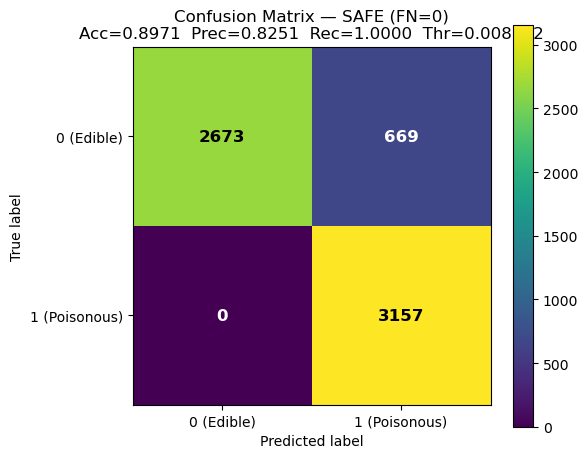


✅ Saved SAFE confusion matrix (FN=0) to: images/confusion_matrix_SAFE.png


In [28]:
# =========================================
# SAFE Confusion Matrix (FN = 0) Generator
# =========================================

# 0) Imports
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
import category_encoders as ce

# --------------------------
# 1) Config / data loading
# --------------------------
# If X, y already exist in your notebook, we’ll reuse them. Otherwise, we load and rebuild.
SAFE_THRESHOLD_DEFAULT = 0.025661  # your thr_safe from training
SAVE_PATH = "images/confusion_matrix_SAFE.png"

def ensure_data_and_model():
    """Return (X, y, final_model, preprocess) — reusing globals when present, else rebuilding."""
    g = globals()

    # If user already has X, y and final_model, reuse them
    X = g.get("X", None)
    y = g.get("y", None)
    final_model = g.get("final_model", None)

    if X is not None and y is not None and final_model is not None:
        return X, y, final_model, None  # preprocess is embedded in final_model pipeline

    # Otherwise, try to rebuild from CSVs (EDIT THESE PATHS if needed)
    TRAIN_CSV = g.get("TRAIN_CSV", None) or "mush_train.csv"
    if not os.path.exists(TRAIN_CSV):
        raise FileNotFoundError(
            f"TRAIN_CSV not found at '{TRAIN_CSV}'. "
            "Please set TRAIN_CSV to your training CSV path or define X, y, final_model beforehand."
        )

    df = pd.read_csv(TRAIN_CSV).set_index(df.columns[0] if "Id" not in df.columns else "Id")
    if "poisonous" not in df.columns:
        raise ValueError("Column 'poisonous' not found in training data.")
    y = df.pop("poisonous").astype(int)
    X = df.copy()

    # Columns by dtype (match your earlier pipeline)
    cat_cols  = X.select_dtypes(include=["object"]).columns.tolist()
    bool_cols = X.select_dtypes(include=["bool", "boolean"]).columns.tolist()

    # Preprocess (same as your snippet)
    cat_preprocess = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("target_enc", ce.TargetEncoder(handle_unknown="impute", handle_missing="impute")),
    ])
    bool_preprocess = Pipeline([
        ("to_int", FunctionTransformer(lambda df: df.astype("int64"))),
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ])
    preprocess = ColumnTransformer(
        transformers=[
            ("cat",  cat_preprocess,  cat_cols),
            ("bool", bool_preprocess, bool_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False
    )

    # Build a reasonable default final_model if not provided.
    # NOTE: If you have tuned params, you can set them here via final_model.set_params(**your_params)
    final_model = Pipeline([
        ("preprocess", preprocess),
        ("gb", HistGradientBoostingClassifier(random_state=42))
    ])

    return X, y, final_model, preprocess

X, y, final_model, _ = ensure_data_and_model()

# --------------------------
# 2) OOF probabilities
# --------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cross_val_predict clones and trains inside each fold → unbiased OOF probabilities
y_proba_oof = cross_val_predict(final_model, X, y, method="predict_proba", cv=cv, n_jobs=-1)[:, 1]
y_true_oof = y.values

# --------------------------
# 3) Apply SAFE threshold, auto-adjust if FN > 0
# --------------------------
def pick_min_threshold_for_perfect_recall(y_true, y_proba):
    """
    Return the smallest threshold that achieves recall == 1.0 (FN == 0).
    If none achieve perfect recall, return the smallest threshold observed.
    """
    prec, rec, thr = precision_recall_curve(y_true, y_proba)
    # rec has length N+1, thr has length N; align them
    rec_ = rec[:-1]
    thr_ = thr
    feasible = (rec_ == 1.0)
    if feasible.any():
        # perfect recall exists; choose the largest threshold within perfect recall (to reduce FPs)
        # or smallest? We want as *large* as possible while recall==1.0 to keep precision higher.
        # We'll take the max threshold among feasible indices.
        return float(thr_[feasible].max())
    # fallback: smallest threshold ensures max recall achievable on curve
    return float(thr_[0])

thr_used = SAFE_THRESHOLD_DEFAULT
y_pred_safe = (y_proba_oof >= thr_used).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true_oof, y_pred_safe, labels=[0,1]).ravel()

if fn > 0:
    # auto-adjust to guarantee FN = 0 on OOF
    thr_perfect = pick_min_threshold_for_perfect_recall(y_true_oof, y_proba_oof)
    thr_used = min(thr_used, thr_perfect)  # be at least as cautious
    y_pred_safe = (y_proba_oof >= thr_used).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true_oof, y_pred_safe, labels=[0,1]).ravel()

print(f"SAFE threshold used: {thr_used:.6f}")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
assert fn == 0, "FN is not zero after SAFE thresholding; inspect data or lower the threshold slightly."

# --------------------------
# 4) Plot + save confusion matrix (readable text on all colors)
# --------------------------
os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)
cm = np.array([[tn, fp],
               [fn, tp]])

acc = (tp + tn) / cm.sum()
prec = tp / (tp + fp) if (tp + fp) > 0 else 1.0
rec  = tp / (tp + fn) if (tp + fn) > 0 else 1.0

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap="viridis")
plt.colorbar(im, ax=ax)

# Contrast-aware annotations
for (i, j), v in np.ndenumerate(cm):
    color = "white" if v < cm.max() / 2 else "black"
    ax.text(j, i, f"{v}", ha="center", va="center", color=color, fontsize=12, fontweight="bold")

ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
ax.set_xticklabels(["0 (Edible)", "1 (Poisonous)"])
ax.set_yticklabels(["0 (Edible)", "1 (Poisonous)"])
ax.set_title(f"Confusion Matrix — SAFE (FN=0)\nAcc={acc:.4f}  Prec={prec:.4f}  Rec={rec:.4f}  Thr={thr_used:.6f}")
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=200, bbox_inches="tight")
plt.show()

print(f"\n✅ Saved SAFE confusion matrix (FN=0) to: {SAVE_PATH}")